# Intro TensorFlow

#### Load Dependencies

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Initialise Seeds

In [2]:
np.random.seed(42)
tf.set_random_seed(42)

#### Create a Dataset

In [3]:
xs = np.linspace(0., 7., 30)
ys = 0.3 * xs - 0.8 + np.random.normal(scale = 0.25, size = len(xs))

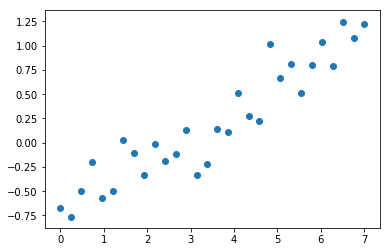

In [4]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)

#### Define Variables

In [5]:
m = tf.Variable(-0.5) # one example
b = tf.Variable(1.0) # bias

#### Define Cost Function (sqrd error)

In [6]:
ys_model = m * xs + b
total_error = tf.reduce_sum((ys - ys_model) ** 2)

#### Define Optimiser

In [7]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(total_error)

#### Define Initialiser

In [8]:
initializer_op = tf.global_variables_initializer()

#### Execute Session

In [9]:
with tf.Session() as session:
    session.run(initializer_op)
    
    n_epochs = 500
    for i in range(n_epochs):
        session.run(optimizer_op)
    
    slope, intercept = session.run([m, b])

In [10]:
slope

0.26341245

In [11]:
intercept

-0.71875358

In [12]:
y_hat = slope + intercept * np.array(xs)

In [13]:
pd.DataFrame(list(zip(ys, y_hat)), columns = ["y", "y_hat"])

,y,y_hat
0,-0.675821,0.263412
1,-0.762152,0.089920
2,-0.493250,-0.083572
3,-0.202001,-0.257064
4,-0.568883,-0.430557
5,-0.496465,-0.604049
6,0.029286,-0.777541
7,-0.101245,-0.951033
8,-0.338058,-1.124525
9,-0.012636,-1.298018


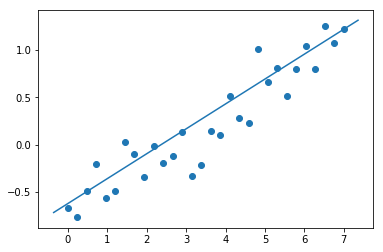

In [14]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope * (x_max - x_min)
ax.plot([x_min, x_max], [y_min, y_max])